In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex, Math

# E2.4
## a)

In [2]:
def eq_disp(varstring, expr):
    display(Latex(f"${varstring}={sp.latex(expr)}$"))
s, t = sp.symbols('s, t')
R = 1/s

The laplace transform of a unit step function is
$$F(s)=\frac{1}{s}$$
The output is given by:
$$Y(s)=G(s)R(s)$$
The transfer function $G(s)$ is given by

In [3]:
G = sp.factor(4*(s + 50)/(s**2 + 30*s + 200))
p, q = G.as_numer_denom()
G

4*(s + 50)/((s + 10)*(s + 20))

To find $Y(s)$ we need the partial fraction expansion of $G(s)R(s)$

We can construct the partial fractions according to:
$$G(s)R(s)=\frac{K_{s 1}}{s+s_1}+\frac{K_{s 2}}{s+s_2}+\cdots+\frac{K_{s n}}{s+s_n}$$

First solve for the n poles 

In [4]:
Y = G*R
p, q = Y.as_numer_denom()
poles = sp.solve(q,s)
for i, pole in enumerate(poles):
    eq_disp(f'-s_{i}', pole)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now we find the numerators $K_{s_i}$

In [5]:
K = []
for pole in poles:
    K.append(sp.simplify(p/q*(s-pole)).subs(s, pole))

In [6]:
p_fracs = [K[i]/(s-poles[i]) for i in range(len(K))]
Y = sum(p_fracs)
eq_disp('Y(s)',Y)

<IPython.core.display.Latex object>

We can check the validity of the partial fractions by comparing their sum to $G(s)R(s)$

In [7]:
sp.factor(G*R) == sp.factor(sum(p_fracs))

True

We can then transform to time domain to obtain $y(t)$

In [8]:
p_fracs_t = []
for frac in p_fracs:
    p_fracs_t.append(sp.inverse_laplace_transform(frac,s, t))
y = sum(p_fracs_t)
eq_disp('y(t)', y)

<IPython.core.display.Latex object>

where $\theta(t)$ is the heaviside function or unit step function

## b)
To get the final value of $y(t)$ we can set the unitstep function to 1

In [9]:
eq_disp('y(\infty)', y.subs(sp.Heaviside(t), 1))

<IPython.core.display.Latex object>

# 2.25

In [10]:
a, x = sp.symbols('a, x')
x0 = 0.6
y = a*x**3
eq_disp('y', y)

<IPython.core.display.Latex object>

The linear approximation is obtained from the first order taylor expansion of the amplifier function at the operating point 

In [11]:
y_lin = y.subs(x, x0) + y.diff(x).subs(x, x0)*(x-x0)
eq_disp('y_{linear}', y_lin)

<IPython.core.display.Latex object>

# 2.31 (denominator unfactorable -> complex poles, K=[0,0])

The transfer function $V(s)$ is given by

In [12]:
V = sp.factor(400/(s**2 + 8*s + 400))
eq_disp('V(s)',V)
p, q = V.as_numer_denom()

<IPython.core.display.Latex object>

The denominator is set to be $q(s)$. $q(s)=0$ is solved to find the poles

In [13]:
poles = sp.solve(q,s)
for i, pole in enumerate(poles):
    eq_disp(f'-s_{i}', pole)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can construct the partial fractions according to:
$$V(s)=\frac{K_{s 1}}{s+s_1}+\frac{K_{s 2}}{s+s_2}+\cdots+\frac{K_{s n}}{s+s_n}$$
And find $K_{si}$ with
$$K_{s i}=\left.\left[\left(s+s_i\right) \frac{p(s)}{q(s)}\right]\right|_{s=-s_i}$$

In [14]:
K = []
for pole in poles:
    K.append(sp.simplify(p/q*(s-pole)).subs(s, pole))

In [15]:
p_fracs = [K[i]/(s-poles[i]) for i in range(len(K))]
V = sum(p_fracs)
eq_disp('V(s)',V)

<IPython.core.display.Latex object>

We can then transform to time domain to obtain $y(t)$

In [16]:
p_fracs_t = []
for frac in p_fracs:
    p_fracs_t.append(sp.inverse_laplace_transform(frac,s, t))
y = sum(p_fracs_t)
eq_disp('y(t)', y)

<IPython.core.display.Latex object>

# 2.26

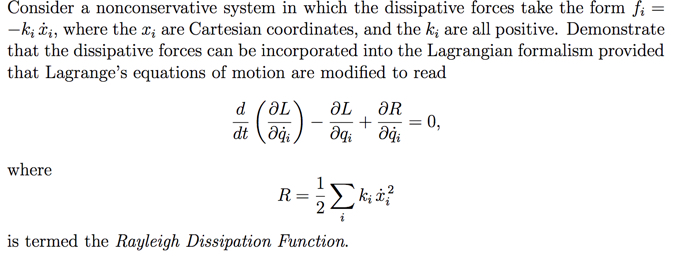The ODE is given by

In [50]:
k, b, m, M = sp.symbols('k, b, m, M')
y = sp.Function('y')(t)
x = sp.Function('x')(t)
F = sp.Function('F')(t)
dx = x.diff(t)
dy = y.diff(t)
ddx = dx.diff(t)
ddy = dy.diff(t)
# Lagrange equations
T = sp.Rational(1,2)*dx**2*M + sp.Rational(1,2)*dy**2*m
R = sp.Rational(1,2)*(dy-dx)**2
U = sp.Rational(1,2)*k*(y-x)**2
L = T-U
msd_sys = sp.Matrix([L.diff(dy).diff(t) - L.diff(y) + R.diff(dy),
                     L.diff(dx).diff(t) - L.diff(x) + R.diff(dx) - F])
eq_disp('0', msd_sys)

<IPython.core.display.Latex object>

Now if we take the laplace transform of the ODE and solve for $\frac{Y(s)}{F(s)}$ we get

In [52]:
Y = sp.solve(sp.laplace_transform(msd_sys[0], t, s), sp.laplace_transform(y, t, s))[0]
F_s = sp.solve(sp.laplace_transform(msd_sys[1], t, s), sp.laplace_transform(F, t, s))[0]
G = sp.simplify(Y/F_s)

In [53]:
G

(-k*LaplaceTransform(x(t), t, s) + s*LaplaceTransform(x(t), t, s) - s*y(0) - x(0) - y(0) - Subs(Derivative(y(t), t), t, 0))/((k + s**2 + s)*(-k*LaplaceTransform(x(t), t, s) + k*LaplaceTransform(y(t), t, s) - s**2*LaplaceTransform(x(t), t, s) - s*LaplaceTransform(x(t), t, s) - s*LaplaceTransform(y(t), t, s) + s*x(0) + x(0) + y(0) + Subs(Derivative(x(t), t), t, 0)))